In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import string
import csv
%matplotlib inline

In [4]:
sentences = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_sentences.csv")
subsetSentences = sentences[sentences['#Events'] == 0]

tokens = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_tokens.csv", skip_blank_lines=True)
subsetTokens = pd.DataFrame()

for i in range(len(subsetSentences.index)):
    subset = tokens[(tokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (tokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    frames = [subsetTokens, subset]
    subsetTokens = pd.concat(frames)
    

In [5]:
subsetTokens.head(5)

,Doc Id,Sentence Id,Token Id Doc,Token Id Sent,Token,Lowercase Token,Start Offset,End Offset,Is Event,Event Id,...,POS Tag Stanford,Lemma Stanford,Lowercase Lemma Stanford,POS Tag,Is Time Expression,Time Expression Id,Time Expression Type,Time Expression Value,Token POS,Lemma POS
226,AP_20130322,10,227,1,The,the,0,3,0,O,...,DT,the,the,DT,0,O,O,O,the-DT,the-DT
227,AP_20130322,10,228,2,government,government,4,14,0,O,...,NN,government,government,NN,0,O,O,O,government-NN,government-NN
228,AP_20130322,10,229,3,only,only,15,19,0,O,...,RB,only,only,RB,0,O,O,O,only-RB,only-RB
229,AP_20130322,10,230,4,does,does,20,24,0,O,...,VBZ,do,do,VB,0,O,O,O,does-VB,do-VB
230,AP_20130322,10,231,5,a,a,25,26,0,O,...,DT,a,a,DT,0,O,O,O,a-DT,a-DT


In [6]:
sum(subsetSentences['#Tokens'])

535

In [7]:
sLength = len(subsetSentences['Doc Id'])
subsetSentences['# POS Tags VB'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        if ('VB' in subset['POS Tag'].iloc[j]):
            count = count + 1
    
    subsetSentences['# POS Tags VB'].iloc[i] = int(count)

/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[

In [8]:
subsetSentences.head(5)

,Doc Id,Sentence Id,Sentence,Lowercase Sentence,#Tokens,Stanford POS Tag,Stanford Lemma,Stanford Lower Lemma,#POS Tags,#Lemmas,#Events,#Time Expressions,All Runs Times,# POS Tags VB
59,AP_20130322,10,The government only does a national flu death ...,the government only does a national flu death ...,12,DT NN RB VBZ DT JJ NN NN NN IN NNS .,the government only do a national flu death co...,the government only do a national flu death co...,12,12,0,0,NaN,1.0
62,AP_20130322,13,That 's more than 2 1/2 times higher than any ...,that 's more than 2 1/2 times higher than any ...,13,DT VBZ JJR IN CD NNS JJR IN DT JJ JJ NN .,that be more than 2 1/2 time higher than any o...,that be more than 2 1/2 time higher than any o...,13,13,0,1,recent season__52__65###season__59__65###recen...,1.0
78,nyt_20130321_cyprus,12,That is a mere rounding error compared with th...,that is a mere rounding error compared with th...,17,DT VBZ DT JJ VBG NN VBN IN DT NN NN NN IN CD C...,that be a mere round error compare with the eu...,that be a mere round error compare with the eu...,17,17,0,0,NaN,3.0
108,nyt_20130321_women_senate,5,`` There still just are n't that many of us . '',`` there still just are n't that many of us . '',12,`` EX RB RB VBP RB IN JJ IN PRP . '',`` there still just be not that many of we . '',`` there still just be not that many of we . '',12,12,0,0,NaN,1.0
111,nyt_20130321_women_senate,8,"A record nine women now lead committees , incl...","a record nine women now lead committees , incl...",16,"DT NN CD NNS RB VBP NNS , VBG DT IN DT RBS JJ ...","a record nine woman now lead committee , inclu...","a record nine woman now lead committee , inclu...",16,16,0,1,now__20__23,2.0


In [9]:
# find the event tokens in each sentences without events
event_count = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv", skip_blank_lines=True)
event_count = event_count.drop_duplicates(subset=["Lowercase Token", "Pos"])
#event_count['Event']

subsetSentences['#Event Tokens'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        for k in range(len(event_count.index)):
            if (subset['Lowercase Token'].iloc[j] == event_count['Lowercase Token'].iloc[k]) & (subset['POS Tag'].iloc[j] == event_count['Pos'].iloc[k]):
                #print("true")
                count = count + 1
    subsetSentences['#Event Tokens'].iloc[i] = int(count)

/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
subsetSentences.head(5)

,Doc Id,Sentence Id,Sentence,Lowercase Sentence,#Tokens,Stanford POS Tag,Stanford Lemma,Stanford Lower Lemma,#POS Tags,#Lemmas,#Events,#Time Expressions,All Runs Times,# POS Tags VB,#Event Tokens
59,AP_20130322,10,The government only does a national flu death ...,the government only does a national flu death ...,12,DT NN RB VBZ DT JJ NN NN NN IN NNS .,the government only do a national flu death co...,the government only do a national flu death co...,12,12,0,0,NaN,1.0,1.0
62,AP_20130322,13,That 's more than 2 1/2 times higher than any ...,that 's more than 2 1/2 times higher than any ...,13,DT VBZ JJR IN CD NNS JJR IN DT JJ JJ NN .,that be more than 2 1/2 time higher than any o...,that be more than 2 1/2 time higher than any o...,13,13,0,1,recent season__52__65###season__59__65###recen...,1.0,1.0
78,nyt_20130321_cyprus,12,That is a mere rounding error compared with th...,that is a mere rounding error compared with th...,17,DT VBZ DT JJ VBG NN VBN IN DT NN NN NN IN CD C...,that be a mere round error compare with the eu...,that be a mere round error compare with the eu...,17,17,0,0,NaN,3.0,0.0
108,nyt_20130321_women_senate,5,`` There still just are n't that many of us . '',`` there still just are n't that many of us . '',12,`` EX RB RB VBP RB IN JJ IN PRP . '',`` there still just be not that many of we . '',`` there still just be not that many of we . '',12,12,0,0,NaN,1.0,0.0
111,nyt_20130321_women_senate,8,"A record nine women now lead committees , incl...","a record nine women now lead committees , incl...",16,"DT NN CD NNS RB VBP NNS , VBG DT IN DT RBS JJ ...","a record nine woman now lead committee , inclu...","a record nine woman now lead committee , inclu...",16,16,0,1,now__20__23,2.0,1.0


In [11]:
# find the event tokens in each sentences without events
event_count = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv", skip_blank_lines=True)
event_count = event_count.drop_duplicates(subset=["Lowercase Lemma Stanford", "Pos"])

subsetSentences['#Event Lemma'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        for k in range(len(event_count.index)):
            if (subset['Lowercase Lemma Stanford'].iloc[j] == event_count['Lowercase Lemma Stanford'].iloc[k]) & (subset['POS Tag'].iloc[j] == event_count['Pos'].iloc[k]):
                count = int(count) + 1
    subsetSentences['#Event Lemma'].iloc[i] = int(count)

/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipyk

In [12]:
event_count.head(5)

,Doc Id,Sentence Id,Event Id,Aspect,End Offset,Event Class,Event Id.1,Is Event,Lemma Stanford,Lowercase Lemma Stanford,...,POS Tag Stanford,Polarity,Pos,Start Offset,Tense,Token,Token Id Doc,Token Id Sent,Token POS,Lemma POS
0,AP_20130322,0,e1000028,NONE,14,B-OCCURRENCE,e1000028,1,season,season,...,NN,POS,NN,8,NONE,season,3,3,season-NN,season-NN
1,AP_20130322,0,e2,PERFECTIVE,50,B-OCCURRENCE,e2,1,kill,kill,...,VBN,POS,VB,44,PRESENT,killed,11,11,killed-VB,kill-VB
2,AP_20130322,1,e3,NONE,18,B-ASPECTUAL,e3,1,start,start,...,VBD,POS,VB,11,PAST,started,24,3,started-VB,start-VB
3,AP_20130322,1,e4,NONE,62,B-ASPECTUAL,e4,1,spark,spark,...,VBG,POS,VB,54,PRESPART,sparking,32,11,sparking-VB,spark-VB
4,AP_20130322,1,e5,NONE,85,B-OCCURRENCE,e5,1,turn,turn,...,VB,POS,VB,81,NONE,turn,36,15,turn-VB,turn-VB


In [13]:
subsetSentences.head(5)

,Doc Id,Sentence Id,Sentence,Lowercase Sentence,#Tokens,Stanford POS Tag,Stanford Lemma,Stanford Lower Lemma,#POS Tags,#Lemmas,#Events,#Time Expressions,All Runs Times,# POS Tags VB,#Event Tokens,#Event Lemma
59,AP_20130322,10,The government only does a national flu death ...,the government only does a national flu death ...,12,DT NN RB VBZ DT JJ NN NN NN IN NNS .,the government only do a national flu death co...,the government only do a national flu death co...,12,12,0,0,NaN,1.0,1.0,2.0
62,AP_20130322,13,That 's more than 2 1/2 times higher than any ...,that 's more than 2 1/2 times higher than any ...,13,DT VBZ JJR IN CD NNS JJR IN DT JJ JJ NN .,that be more than 2 1/2 time higher than any o...,that be more than 2 1/2 time higher than any o...,13,13,0,1,recent season__52__65###season__59__65###recen...,1.0,1.0,3.0
78,nyt_20130321_cyprus,12,That is a mere rounding error compared with th...,that is a mere rounding error compared with th...,17,DT VBZ DT JJ VBG NN VBN IN DT NN NN NN IN CD C...,that be a mere round error compare with the eu...,that be a mere round error compare with the eu...,17,17,0,0,NaN,3.0,0.0,2.0
108,nyt_20130321_women_senate,5,`` There still just are n't that many of us . '',`` there still just are n't that many of us . '',12,`` EX RB RB VBP RB IN JJ IN PRP . '',`` there still just be not that many of we . '',`` there still just be not that many of we . '',12,12,0,0,NaN,1.0,0.0,1.0
111,nyt_20130321_women_senate,8,"A record nine women now lead committees , incl...","a record nine women now lead committees , incl...",16,"DT NN CD NNS RB VBP NNS , VBG DT IN DT RBS JJ ...","a record nine woman now lead committee , inclu...","a record nine woman now lead committee , inclu...",16,16,0,1,now__20__23,2.0,1.0,2.0


In [14]:
subsetSentences = subsetSentences.sort_values(by='#Tokens')
subsetSentences.to_csv('../../data/TempEval3-data/TE3-Platinum_subset_sentences_without_events.csv', index=False)

In [33]:
subsetSentences = pd.read_csv('../../data/TempEval3-data/TE3-Platinum_subset_sentences_without_events.csv')

In [34]:
subsetSentences.head(5)

,Doc Id,Sentence Id,Sentence,Lowercase Sentence,#Tokens,Stanford POS Tag,Stanford Lemma,Stanford Lower Lemma,#POS Tags,#Lemmas,#Events,#Time Expressions,All Runs Times,# POS Tags VB,#Event Tokens,#Event Lemma
0,CNN_20130321_821,5,They have an agenda .,they have an agenda .,5,PRP VBP DT NN .,they have a agenda .,they have a agenda .,5,5,0,0,NaN,1.0,1.0,1.0
1,WSJ_20130321_1145,9,But Leon can still run .,but leon can still run .,6,CC NNP MD RB VB .,but Leon can still run .,but leon can still run .,6,6,0,0,NaN,1.0,1.0,1.0
2,CNN_20130322_1243,11,The entire experience is frictionless .,the entire experience is frictionless .,6,DT JJ NN VBZ JJ .,the entire experience be frictionless .,the entire experience be frictionless .,6,6,0,0,NaN,1.0,0.0,1.0
3,CNN_20130322_1243,21,But it is a well-exectuted refinement .,but it is a well-exectuted refinement .,7,CC PRP VBZ DT JJ NN .,but it be a well-exectuted refinement .,but it be a well-exectuted refinement .,7,7,0,0,NaN,1.0,0.0,1.0
4,bbc_20130322_1150,7,`` There was a great feeling of euphoria from ...,`` there was a great feeling of euphoria from ...,11,`` EX VBD DT JJ NN IN NN IN NN .,`` there be a great feeling of euphoria from e...,`` there be a great feeling of euphoria from e...,11,11,0,0,NaN,1.0,1.0,1.0


In [35]:
subsetSentences = subsetSentences.reset_index()

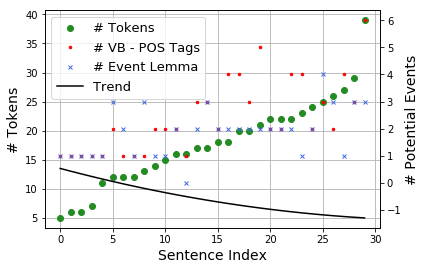

In [36]:
ax = plt.gca()

# add the second axis
ax2 = ax.twinx()

lns1 = ax.plot(subsetSentences['#Tokens'], 'o', c='forestgreen', lw=2.5, label = '# Tokens')
lns2 = ax2.plot(subsetSentences['# POS Tags VB'], 'o', color='red', ms=2.5, label = '# VB - POS Tags')
lns3 = ax2.plot(subsetSentences['#Event Lemma'], 'x', ms=4, color='royalblue', label = '# Event Lemma')

# prepare and plot the trend line
difference = subsetSentences['#Event Lemma'] - subsetSentences['# POS Tags VB']
z = np.polyfit(subsetSentences['index'], difference,2)
p = np.poly1d(z)
lns4 = ax2.plot(subsetSentences['index'], p(subsetSentences['index']),'k-', label = 'Trend')

# add grid to the chart
ax.grid(True)

# setup the label for each axis
ax.set_xlabel('Sentence Index', fontsize=14, color='black')  
ax.set_ylabel('# Tokens', fontsize=14, color='black')  
ax2.set_ylabel('# Potential Events', fontsize=14, color='black') 

# added the four lines in the legend
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop={'size':13})

#plt.legend(prop={'size':13})
#plt.show()

plt.savefig('../../plots/unlabeled_sentences_platinum_stats.pdf', format='pdf', dpi=1200)



In [44]:
min(subsetSentences["#Tokens"])

5

In [45]:
max(subsetSentences["#Tokens"])

39

In [46]:
sum(subsetSentences["#Tokens"])/len(subsetSentences["#Tokens"])

17.833333333333332

In [47]:
min(subsetSentences['# POS Tags VB'])

1.0

In [48]:
max(subsetSentences['# POS Tags VB'])

6.0

In [49]:
sum(subsetSentences["# POS Tags VB"])/len(subsetSentences["# POS Tags VB"])

2.433333333333333

In [50]:
min(subsetSentences['#Event Tokens'])

0.0

In [51]:
max(subsetSentences['#Event Tokens'])

3.0

In [52]:
sum(subsetSentences["#Event Tokens"])/len(subsetSentences["#Event Tokens"])

0.9

In [53]:
min(subsetSentences['#Event Lemma'])

0.0

In [54]:
max(subsetSentences['#Event Lemma'])

4.0

In [55]:
sum(subsetSentences["#Event Lemma"])/len(subsetSentences["#Event Lemma"])

1.8666666666666667

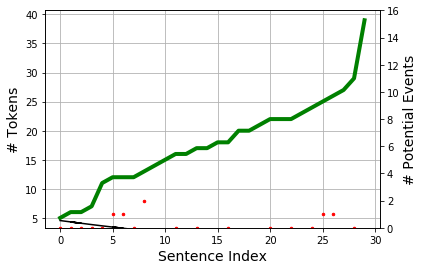

In [56]:
ax = plt.gca()
ax2 = ax.twinx()

difference = subsetSentences['#Event Lemma'] - subsetSentences['# POS Tags VB']
z = np.polyfit(subsetSentences['index'], difference,2)
p = np.poly1d(z)


plt.ylim(0, 16)
ax.plot(subsetSentences['#Tokens'], c='green', lw=4)
ax2.plot(subsetSentences['#Event Lemma'] - subsetSentences['# POS Tags VB'], 'o', color='r', ms=2.5)
#ax2.plot(subsetSentences['# Event Tokens'])
#ax2.plot(subsetSentences['# Event Lemma'], 'x', ms=4, color='b')

ax2.plot(subsetSentences['index'], p(subsetSentences['index']),'k-')
ax.grid(True)
#plt.title("Potential Event Distribution per Unlabeled Expert Sentence ", fontsize=20,color='black')
ax.set_xlabel('Sentence Index', fontsize=14, color='black')  
ax.set_ylabel('# Tokens', fontsize=14, color='black')  
ax2.set_ylabel('# Potential Events', fontsize=14, color='black') 
plt.show()



In [57]:
subsetSentences
subsetSentences = subsetSentences.sort_values('#Event Tokens', ascending=[1])
subsetSentences = subsetSentences.reset_index(drop=True)

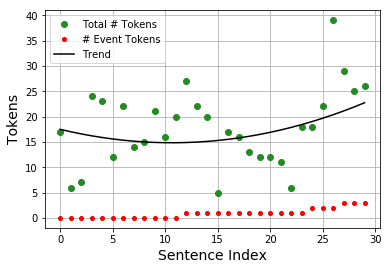

In [58]:
plt.plot(subsetSentences.index, subsetSentences['#Tokens'], "o", c="forestgreen", lw=2.5, label = 'Total # Tokens')
plt.plot(subsetSentences.index, subsetSentences['#Event Tokens'], "o", ms=4, color='red', label = '# Event Tokens')

# prepare and plot the trend line
difference = subsetSentences['#Tokens'] - subsetSentences['#Event Tokens']
z = np.polyfit(subsetSentences.index, difference,2)
p = np.poly1d(z)
lns4 = plt.plot(subsetSentences.index, p(subsetSentences.index),'k-', label = 'Trend')

# add grid to the chart
plt.grid(True)

# setup the label for each axis
plt.xlabel('Sentence Index', fontsize=14, color='black')  
plt.ylabel('Tokens', fontsize=14, color='black')  

plt.legend(loc='upper left')

In [59]:
subsetSentences
subsetSentences = subsetSentences.sort_values('#Event Lemma', ascending=[1])
subsetSentences = subsetSentences.reset_index(drop=True)

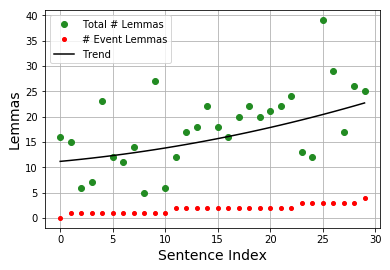

In [60]:
plt.plot(subsetSentences.index, subsetSentences['#Tokens'], "o", c="forestgreen", lw=2.5, label = 'Total # Lemmas')
plt.plot(subsetSentences.index, subsetSentences['#Event Lemma'], "o", ms=4, color='red', label = '# Event Lemmas')

# prepare and plot the trend line
difference = subsetSentences['#Tokens'] - subsetSentences['#Event Lemma']
z = np.polyfit(subsetSentences.index, difference,2)
p = np.poly1d(z)
lns4 = plt.plot(subsetSentences.index, p(subsetSentences.index),'k-', label = 'Trend')

# add grid to the chart
plt.grid(True)

# setup the label for each axis
plt.xlabel('Sentence Index', fontsize=14, color='black')  
plt.ylabel('Lemmas', fontsize=14, color='black')  

plt.legend(loc='upper left')
plt.show()

In [61]:
sentences = pd.read_csv("../../data/TempEval3-data/TE3-Gold_sentences.csv")
subsetSentences = sentences[sentences['#Events'] == 0]

tokens = pd.read_csv("../../data/TempEval3-data/TE3-Gold_tokens.csv", skip_blank_lines=True)
subsetTokens = pd.DataFrame()

for i in range(len(subsetSentences.index)):
    subset = tokens[(tokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (tokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    frames = [subsetTokens, subset]
    subsetTokens = pd.concat(frames)

In [62]:
sum(subsetSentences['#Tokens'])

5694

In [63]:
sLength = len(subsetSentences['Doc Id'])
subsetSentences['# POS Tags VB'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        if ('VB' in subset['POS Tag'].iloc[j]):
            count = count + 1
    
    subsetSentences['# POS Tags VB'].iloc[i] = int(count)

/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[

In [ ]:
# find the event tokens in each sentences without events
event_count = pd.read_csv("../../data/TempEval3-data/TE3-Gold_events.csv", skip_blank_lines=True)
#event_count['Event']
event_count = event_count.drop_duplicates(subset=["Lowercase Token", "Pos"])

subsetSentences['#Event Tokens'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        for k in range(len(event_count.index)):
            if (subset['Lowercase Token'].iloc[j] == event_count['Lowercase Token'].iloc[k]) & (subset['POS Tag'].iloc[j] == event_count['Pos'].iloc[k]):
                #print("true")
                count = count + 1
    subsetSentences['#Event Tokens'].iloc[i] = int(count)

/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/oanainel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# find the event tokens in each sentences without events
event_count = pd.read_csv("../../data/TempEval3-data/TE3-Gold_events.csv", skip_blank_lines=True)
event_count = event_count.drop_duplicates(subset=["Lowercase Lemma Stanford", "Pos"])

subsetSentences['#Event Lemma'] = pd.Series(np.random.randn(sLength), index=subsetSentences.index)

for i in range(len(subsetSentences.index)):
    
    subset = subsetTokens[(subsetTokens['Doc Id'] == subsetSentences['Doc Id'].iloc[i]) & (subsetTokens['Sentence Id'] == subsetSentences['Sentence Id'].iloc[i])]
    count = 0
    for j in range(len(subset.index)):
        for k in range(len(event_count.index)):
            if (subset['Lowercase Lemma Stanford'].iloc[j] == event_count['Lowercase Lemma Stanford'].iloc[k]) & (subset['POS Tag'].iloc[j] == event_count['Pos'].iloc[k]):
                count = int(count) + 1
    subsetSentences['#Event Lemma'].iloc[i] = int(count)
subsetSentences = subsetSentences.sort_values(by='#Tokens')

In [ ]:
subsetSentences.to_csv('../../data/TempEval3-data/TE3-Gold_subset_sentences_without_events.csv', index=False)

In [ ]:
subsetSentences = subsetSentences.reset_index()

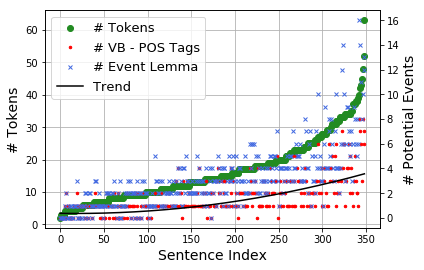

In [3]:
subsetSentences = pd.read_csv('../../data/TempEval3-data/TE3-Gold_subset_sentences_without_events.csv')
subsetSentences = subsetSentences.reset_index()
ax = plt.gca()

# add the second axis
ax2 = ax.twinx()

lns1 = ax.plot(subsetSentences['#Tokens'], 'o', c='forestgreen', lw=2.5, label = '# Tokens')
lns2 = ax2.plot(subsetSentences['# POS Tags VB'], 'o', color='red', ms=2.5, label = '# VB - POS Tags')
lns3 = ax2.plot(subsetSentences['#Event Lemma'], 'x', ms=4, color='royalblue', label = '# Event Lemma')

# prepare and plot the trend line
difference = subsetSentences['#Event Lemma'] - subsetSentences['# POS Tags VB']
z = np.polyfit(subsetSentences['index'], difference,2)
p = np.poly1d(z)
lns4 = ax2.plot(subsetSentences['index'], p(subsetSentences['index']),'k-', label = 'Trend')

# add grid to the chart
ax.grid(True)

# setup the label for each axis
ax.set_xlabel('Sentence Index', fontsize=14, color='black')  
ax.set_ylabel('# Tokens', fontsize=14, color='black')  
ax2.set_ylabel('# Potential Events', fontsize=14, color='black') 

# added the four lines in the legend
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop={'size':13})

#plt.legend(prop={'size':13})
#plt.show()

plt.savefig('../../plots/unlabeled_sentences_gold_stats.pdf', format='pdf', dpi=1200)
